In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn import linear_model, metrics
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import SelectFromModel
import xgboost as xgb

In [7]:
# load data
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

# remove constant columns
remove = []
for col in df_train.columns:
    if df_train[col].std() == 0:
        remove.append(col)

df_train.drop(remove, axis=1, inplace=True)
df_test.drop(remove, axis=1, inplace=True)

# remove duplicated columns
remove = []
c = df_train.columns
for i in range(len(c)-1):
    v = df_train[c[i]].values
    for j in range(i+1,len(c)):
        if np.array_equal(v,df_train[c[j]].values):
            remove.append(c[j])

df_train.drop(remove, axis=1, inplace=True)
df_test.drop(remove, axis=1, inplace=True)

t_train = df_train['TARGET'].values
X_train = df_train.drop(['ID','TARGET'], axis=1).values

id_test = df_test['ID']
X_test = df_test.drop(['ID'], axis=1).values

# length of dataset
len_train = len(X_train)
len_test  = len(X_test)

# classifier
clf = xgb.XGBClassifier(missing=np.nan, max_depth=5, n_estimators=350, learning_rate=0.03, nthread=4, 
                        subsample=0.95, colsample_bytree=0.85, seed=4242)

X_fit, X_eval, t_fit, t_eval= train_test_split(X_train, t_train, test_size=0.25)

# fitting
clf.fit(X_train, t_train, early_stopping_rounds=20, eval_metric="auc", eval_set=[(X_eval, t_eval)])

#print('Overall AUC:', roc_auc_score(t_train, clf.predict_proba(X_train)[:,1]))

Will train until validation_0 error hasn't decreased in 20 rounds.
[0]	validation_0-auc:0.821538
[1]	validation_0-auc:0.828766
[2]	validation_0-auc:0.828869
[3]	validation_0-auc:0.810459
[4]	validation_0-auc:0.796642
[5]	validation_0-auc:0.800724
[6]	validation_0-auc:0.809246
[7]	validation_0-auc:0.809643
[8]	validation_0-auc:0.799603
[9]	validation_0-auc:0.810983
[10]	validation_0-auc:0.813157
[11]	validation_0-auc:0.814126
[12]	validation_0-auc:0.813012
[13]	validation_0-auc:0.807614
[14]	validation_0-auc:0.809515
[15]	validation_0-auc:0.811224
[16]	validation_0-auc:0.812446
[17]	validation_0-auc:0.811311
[18]	validation_0-auc:0.812157
[19]	validation_0-auc:0.812634
[20]	validation_0-auc:0.813660
[21]	validation_0-auc:0.815160
[22]	validation_0-auc:0.816889
Stopping. Best iteration:
[2]	validation_0-auc:0.828869



XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.85,
       gamma=0, learning_rate=0.03, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=350, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=4242, silent=True, subsample=0.95)

In [3]:
# predicting
y_pred= clf.predict_proba(X_test)[:,1]

#submission = pd.DataFrame({"ID":id_test, "TARGET":y_pred})
#submission.to_csv("submission.csv", index=False)

In [4]:
y_pred

array([ 0.26886797,  0.27066481,  0.25242105, ...,  0.25222722,
        0.27845746,  0.25222722], dtype=float32)

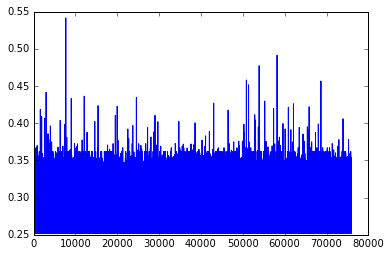

In [5]:
plt.plot(y_pred)